# GENERATE CONSOLIDATED TRAINING SET

    This Section focus on consolidating multiple training sets generated from simulator.
    Most of the training set ends with car running off-track and failed attempts to put car
    on track. will stich together all these trainings sets for larger data set. since the
    images as the end of these sets are kind of noise, will trim last 100 samples.

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

%matplotlib inline

## Training Set Path

In [2]:
#   Training sets

dir_set = "./"
pddf = pd.read_csv(dir_set+"all_training_fix.csv",sep=',',names=['sno','center','left','right','steering','throttle','brake','speed'])
pddf = pddf.drop(pddf.columns[0],1)  # Column, axis

## Read & Consolidate Training Sets

In [3]:
print(np.shape(pddf))

(21908, 7)


## Training Sets Summary

In [4]:
pddf.head(10)

,center,left,right,steering,throttle,brake,speed
0,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000084
1,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000080
2,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000083
3,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078
4,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000079
5,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000080
6,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078
7,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000079
8,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078
9,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078


# DATA PREPARATION

In [5]:
#  Extract Image file name
pddf['center'] = pddf['center'].str.replace(".*center","center")
pddf['left']   = pddf['left'].str.replace(".*left","left")
pddf['right']  = pddf['right'].str.replace(".*right","right")

In [6]:
pddf.head(10)

,center,left,right,steering,throttle,brake,speed
0,center_2017_01_31_11_28_52_609.jpg,left_2017_01_31_11_28_52_609.jpg,right_2017_01_31_11_28_52_609.jpg,0.0,0.0,0,0.000084
1,center_2017_01_31_11_28_52_707.jpg,left_2017_01_31_11_28_52_707.jpg,right_2017_01_31_11_28_52_707.jpg,0.0,0.0,0,0.000080
2,center_2017_01_31_11_28_52_811.jpg,left_2017_01_31_11_28_52_811.jpg,right_2017_01_31_11_28_52_811.jpg,0.0,0.0,0,0.000083
3,center_2017_01_31_11_28_52_914.jpg,left_2017_01_31_11_28_52_914.jpg,right_2017_01_31_11_28_52_914.jpg,0.0,0.0,0,0.000078
4,center_2017_01_31_11_28_53_017.jpg,left_2017_01_31_11_28_53_017.jpg,right_2017_01_31_11_28_53_017.jpg,0.0,0.0,0,0.000079
5,center_2017_01_31_11_28_53_418.jpg,left_2017_01_31_11_28_53_418.jpg,right_2017_01_31_11_28_53_418.jpg,0.0,0.0,0,0.000080
6,center_2017_01_31_11_28_53_523.jpg,left_2017_01_31_11_28_53_523.jpg,right_2017_01_31_11_28_53_523.jpg,0.0,0.0,0,0.000078
7,center_2017_01_31_11_28_53_626.jpg,left_2017_01_31_11_28_53_626.jpg,right_2017_01_31_11_28_53_626.jpg,0.0,0.0,0,0.000079
8,center_2017_01_31_11_28_53_733.jpg,left_2017_01_31_11_28_53_733.jpg,right_2017_01_31_11_28_53_733.jpg,0.0,0.0,0,0.000078
9,center_2017_01_31_11_28_53_843.jpg,left_2017_01_31_11_28_53_843.jpg,right_2017_01_31_11_28_53_843.jpg,0.0,0.0,0,0.000078


##  Exploratory Analysis

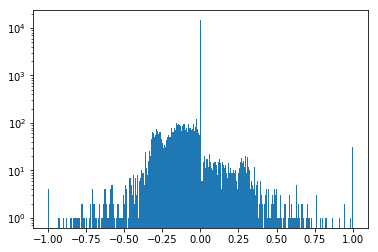

In [7]:
# --- Steering Angle Distribution ---
fig = plt.hist(pddf['steering'],bins=500)
plt.yscale('log')

pddf['steering'].value_counts()

## Trim Zero Steering Angle Data

Data set Shape : (21908, 7)
Zero Angle Images :  (14534, 7)
Merged Shape (21181, 7)


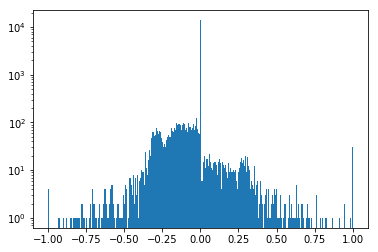

In [8]:
# --- Trim Zero Steering Angle Data ---

print("Data set Shape :",pddf.shape)

# Segregate Zero and Non-Zero Steering Angle Images
pddf_zero = pddf.loc[pddf['steering']==0.0,:]          # Zero Steering Angle Images
pddf      = pddf.loc[pddf['steering']!=0.0,:]          # Non-Zero Steering Angle Images, 

print("Zero Angle Images : ",pddf_zero.shape)

# Sample Zero Steering Angle Images
pddf_zero_sample = pddf_zero.sample(int(pddf_zero.shape[0] * 0.95))   # Sample 30% of Zero Steering Angle Images

# Merge Zero Steering Angle Date
pddf      = pd.concat([pddf, pddf_zero_sample])
print("Merged Shape",pddf.shape)

fig=plt.hist(pddf['steering'], bins=500)
plt.yscale('log')

# DATA AUGMENTATION

## Add Skewed Left and Right Camera Images

In [9]:
pddf_data = pddf[['center','steering']]          # From here  this DF refers consolidated Data
pddf_left = pddf[['left','steering']]            # Left camera Images
pddf_right = pddf[['right','steering']]          # Right Camera Images

pddf_left.columns = ['center','steering']
pddf_right.columns = ['center','steering']


# steering away from left curb
pddf_left_shift0p1 = pddf_left.loc[(pddf_left['steering']<0.9) & (pddf_left['steering']>-0.9),:]
np.shape(pddf_left_shift0p1)
pddf_left_shift0p1['steering'] = pddf_left_shift0p1['steering'] + 0.25


# steering away from right curb
pddf_right_shift0p1 = pddf_right.loc[(pddf_right['steering']>-0.9) & (pddf_right['steering']<0.9),:]
np.shape(pddf_right_shift0p1)
pddf_right_shift0p1['steering'] = pddf_right_shift0p1['steering'] - 0.25

# Merge Center and Skewed Left and right Images
pddf_data = pd.concat([pddf_data,pddf_left_shift0p1,pddf_right_shift0p1])

/home/atchirc/miniconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/atchirc/miniconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(63449, 2)


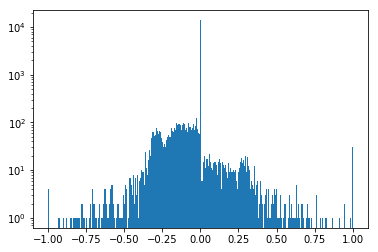

In [10]:
print(pddf_data.shape)
fig=plt.hist(pddf['steering'], bins=500)
plt.yscale('log')

## Flip Images

In [11]:
# Make a copy of Flip DataFrame
pddf_data_flip = pddf_data.copy()

pddf_data_flip['center']   = pddf_data_flip['center'].str.replace('center_','center_flip_')  # insert flip to image name
pddf_data_flip['center']   = pddf_data_flip['center'].str.replace('left_','left_flip_')      # insert flip to image name
pddf_data_flip['center']   = pddf_data_flip['center'].str.replace('right_','right_flip_')    # insert flip to image name
pddf_data_flip['steering'] = pddf_data_flip['steering']*-1                              # steering angle * -1

pddf_data.head(10)

,center,steering
35,center_2017_01_31_11_28_56_583.jpg,-0.290997
37,center_2017_01_31_11_28_56_792.jpg,-0.195954
40,center_2017_01_31_11_28_57_117.jpg,-0.284908
41,center_2017_01_31_11_28_57_222.jpg,-0.200301
42,center_2017_01_31_11_28_57_329.jpg,-0.548699
43,center_2017_01_31_11_28_57_430.jpg,-0.852315
44,center_2017_01_31_11_28_57_536.jpg,-0.535094
45,center_2017_01_31_11_28_57_644.jpg,-0.236721
46,center_2017_01_31_11_28_57_750.jpg,-0.130423
50,center_2017_01_31_11_28_58_159.jpg,-0.077681


In [12]:
pddf_data_flip.head(10)

,center,steering
35,center_flip_2017_01_31_11_28_56_583.jpg,0.290997
37,center_flip_2017_01_31_11_28_56_792.jpg,0.195954
40,center_flip_2017_01_31_11_28_57_117.jpg,0.284908
41,center_flip_2017_01_31_11_28_57_222.jpg,0.200301
42,center_flip_2017_01_31_11_28_57_329.jpg,0.548699
43,center_flip_2017_01_31_11_28_57_430.jpg,0.852315
44,center_flip_2017_01_31_11_28_57_536.jpg,0.535094
45,center_flip_2017_01_31_11_28_57_644.jpg,0.236721
46,center_flip_2017_01_31_11_28_57_750.jpg,0.130423
50,center_flip_2017_01_31_11_28_58_159.jpg,0.077681


In [13]:
# Flip and save Image Center Camera Images

training_dir = './SimulatorTrainingData/all_training/'

def flip_save(img_path):
    global training_dir ;        # Training data directory
    plt.imsave(
                training_dir+img_path,   # Flip File Name
                np.fliplr(plt.imread(training_dir+img_path.replace('flip_',''))),              # Flip np array
                format='jpg'
                )
    
for img_path in pddf_data_flip['center'].values:
    flip_save(img_path)

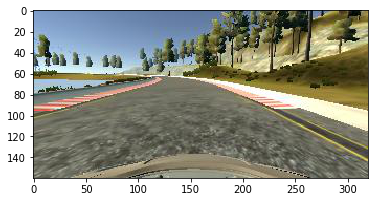

In [14]:
plt.imshow(plt.imread(training_dir+pddf_data['center'].values[100]))

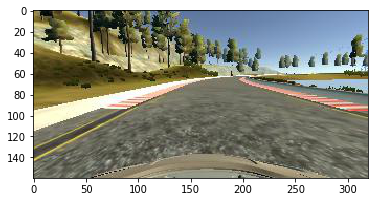

In [15]:
plt.imshow(plt.imread(training_dir+pddf_data_flip['center'].values[100]))

# TRAINING SET PREPARATION

## Merge Acutal and Flipped Images

In [16]:
train = pd.concat([pddf_data, pddf_data_flip])

## Analize Merged Data Steering Angle

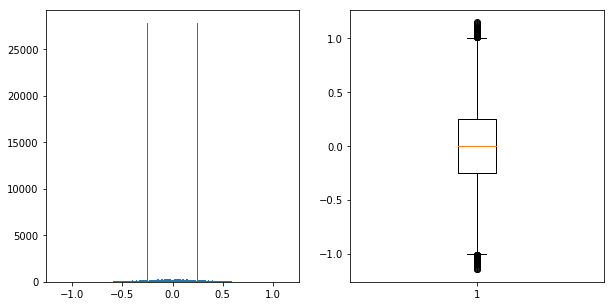

In [17]:
canvas = plt.figure(figsize=(10,5))

steer_hist = canvas.add_subplot(1,2,1)
fig = steer_hist.hist(train['steering'],bins=500)

steer_boxplot = canvas.add_subplot(1,2,2)
fig = steer_boxplot.boxplot(train['steering'].values)

## Outlier Treatment

# Outlier Treatment

# Prune steering angle values > 0.6

train = train.loc[train['steering']<=0.6]
train = train.loc[train['steering']>=-0.6]

# Obervations : 
#    Model fails to learn to steer to center when its close to curb


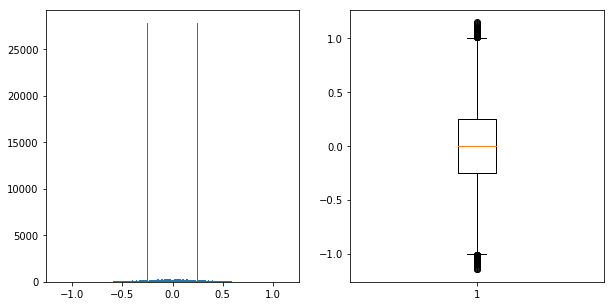

In [18]:
canvas = plt.figure(figsize=(10,5))

steer_hist = canvas.add_subplot(1,2,1)
fig = steer_hist.hist(train['steering'],bins=500)

steer_boxplot = canvas.add_subplot(1,2,2)
fig = steer_boxplot.boxplot(train['steering'].values)

# CREATE TRAIN, VALIDATION & TEST DATA

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

##  Split Data set

In [27]:
# Create Train & Test Set
X_train, X_test, y_train, y_test = train_test_split(train['center'], train['steering'], test_size=0.45, random_state=100)


# --- Summary ----
# X_train --> Training set
# X_test  --> Test set

## Load Images

In [28]:
# Load Images

read_image = lambda x : plt.imread(training_dir+x)

X_train_image = np.asarray(list(map(read_image, X_train)))    # Training Images
#X_test_image  = np.asarray(list(map(read_image, X_test)))     # Test Images

In [29]:
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

# SAVING DATA IN PICKLE FORMAT

In [ ]:
import pickle
import os

# --- save to pickle file ----

pickle_file = training_dir+"data_WithZero0p95_AugSides_2sig_ang0p25"+".pickle"
print(pickle_file)

if not os.path.isfile(pickle_file):
    print('Saving preprocessed data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': X_train_image,
                    'train_labels': y_train,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

#'test_dataset': X_test_image,
#'test_labels': y_test,

./SimulatorTrainingData/all_training/data_WithZero0p95_AugSides_2sig_ang0p25.pickle
Saving preprocessed data to pickle file...
Data cached in pickle file.


In [24]:
print(np.shape(X_train_image))
print(np.shape(X_test_image))

(124360, 160, 320, 3)
(2538, 160, 320, 3)


In [ ]:
print(np.asarray(y_train)[0])